In [1]:
# !pip install mpl_finance
# !pip install yfinance

     |████████████████████████████████| 9.8 MB 10.9 MB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=c5dd3ab20a5bb4968b97535f726bfc94ce5ba7b788b2388e337d94d7767a19d0
  Stored in directory: /Users/eitanohana/Library/Caches/pip/wheels/28/79/3c/08a301b673366fe664fe2853e136eb2acc1bb752045c11c6a1
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8369 sha256=f0a5590cf45b0c20c83189ebcc01c8fffa5b5bc3591fd561c421f0560306fa65
  Stored in directory: /Users/eitanohana/Library/Caches/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
  Attempting uninstall: pandas
    Found existing installation: pandas 0.23.4
    Uninstalling pandas-0.23.4:
      Successfully uninstalled pandas-0.23.4


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import math
import sklearn
from sklearn.preprocessing import StandardScaler
import datetime
import os
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
import yfinance as yf

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

import matplotlib.pyplot as plt

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

## We'll train on AAPL

In [6]:
apple = yf.Ticker('AAPL')
apple_data = apple.history(start="2012-01-01", end="2020-02-29", auto_adjust=True, actions=False)
apple_data

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,50.77,51.15,50.72,50.99,75555200
2012-01-04,50.84,51.42,50.75,51.27,65005500
2012-01-05,51.46,51.90,51.17,51.84,67817400
2012-01-06,52.05,52.42,51.99,52.38,79573200
2012-01-09,52.76,53.04,52.25,52.30,98506100
...,...,...,...,...,...
2020-02-24,297.26,304.18,289.23,298.18,55548800
2020-02-25,300.95,302.53,286.13,288.08,57668400
2020-02-26,286.53,297.88,286.50,292.65,49513700


In [10]:
apple_data.index

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2020-02-14', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28'],
              dtype='datetime64[ns]', name='Date', length=2052, freq=None)

In [11]:
apple_data['num_date'] = dates.date2num(apple_data.index)
apple_data

,Open,High,Low,Close,Volume,num_date
Date,,,,,,
2012-01-03,50.77,51.15,50.72,50.99,75555200,734505.0
2012-01-04,50.84,51.42,50.75,51.27,65005500,734506.0
2012-01-05,51.46,51.90,51.17,51.84,67817400,734507.0
2012-01-06,52.05,52.42,51.99,52.38,79573200,734508.0
2012-01-09,52.76,53.04,52.25,52.30,98506100,734511.0
...,...,...,...,...,...,...
2020-02-24,297.26,304.18,289.23,298.18,55548800,737479.0
2020-02-25,300.95,302.53,286.13,288.08,57668400,737480.0
2020-02-26,286.53,297.88,286.50,292.65,49513700,737481.0


In [12]:
# Create a list of lists where each inner-list represents
# one day's trading history
apple = apple_data[['num_date', 'Open', 'High', 'Low', 'Close', 'Volume']]
apple_list = apple.values.tolist()

Plot a candlestick chart for Apples stock

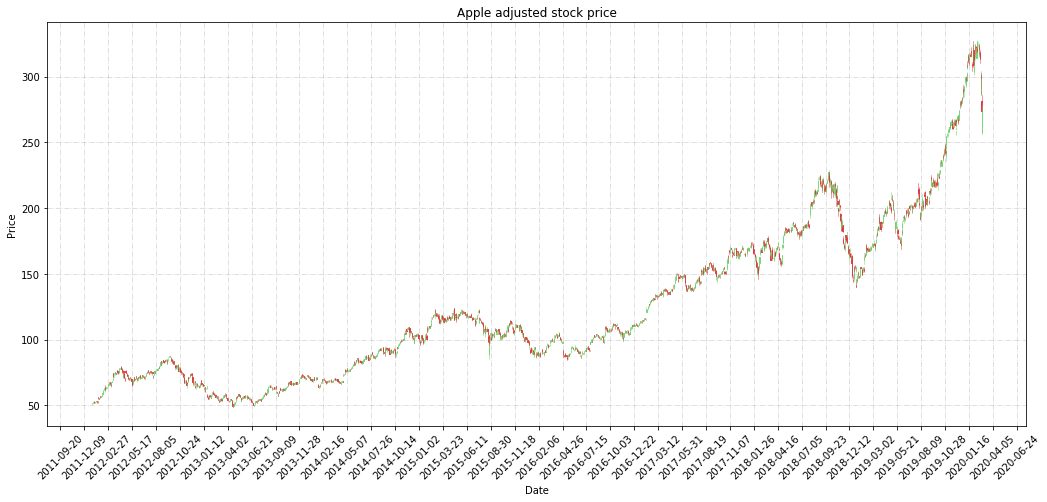

In [13]:

# Build the plot
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot2grid((1,1), (0,0))

candlestick_ohlc(ax1, apple_list, width=0.4, colorup='#77d879', colordown='#db3f3f',)

for label in ax1.xaxis.get_ticklabels():
     label.set_rotation(45)

ax1.xaxis.set_major_formatter(dates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mticker.MaxNLocator(50))
ax1.grid(True, alpha=0.5, linestyle='-.')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple adjusted stock price')
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

# Scaling the data

In [0]:
apple = apple[['Open', 'High', 'Low', 'Close', 'Volume']]
apple

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,50.77,51.15,50.72,50.99,75555200
2012-01-04,50.84,51.42,50.75,51.27,65005500
2012-01-05,51.46,51.90,51.17,51.84,67817400
2012-01-06,52.05,52.42,51.99,52.38,79573200
2012-01-09,52.76,53.04,52.25,52.30,98506100
...,...,...,...,...,...
2020-02-24,297.26,304.18,289.23,298.18,55548800
2020-02-25,300.95,302.53,286.13,288.08,57668400
2020-02-26,286.53,297.88,286.50,292.65,49513700


In [18]:
data = apple.values
data[:3]

array([[7.34505e+05, 5.07700e+01, 5.11500e+01, 5.07200e+01, 5.09900e+01,
        7.55552e+07],
       [7.34506e+05, 5.08400e+01, 5.14200e+01, 5.07500e+01, 5.12700e+01,
        6.50055e+07],
       [7.34507e+05, 5.14600e+01, 5.19000e+01, 5.11700e+01, 5.18400e+01,
        6.78174e+07]])

#### Split the data into training and testing sets

In [19]:
test_size = 365

train_data = data[:-test_size]
test_data = data[-test_size:]

In [20]:
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
train_data = torch.FloatTensor(train_data).to(device)
len(train_data), train_data[:3]

(1687,
 tensor([[-1.7321e+00, -1.3743e+00, -1.3776e+00, -1.3598e+00, -1.3671e+00,
           2.1625e-01],
         [-1.7307e+00, -1.3725e+00, -1.3706e+00, -1.3590e+00, -1.3598e+00,
           6.4320e-04],
         [-1.7293e+00, -1.3565e+00, -1.3583e+00, -1.3481e+00, -1.3452e+00,
           5.8111e-02]]))

In [21]:
scaler = StandardScaler()
test_data = scaler.fit_transform(test_data)
test_data = torch.FloatTensor(test_data).to(device)
len(test_data), test_data[:3]

(365, tensor([[-1.7239,  0.0520,  0.0203, -0.0083, -0.0443,  0.4056],
         [-1.7174, -0.0409, -0.0030, -0.0114, -0.0367, -0.0054],
         [-1.7109, -0.0257, -0.0500, -0.0503, -0.0339, -0.3304]]))

In [22]:
# we split the data into 100 day sequences of open, high, low, close data
# and the target value to be the next days closing price.
def create_sequences(input_data, seq_len):
    seq = []
    L = len(input_data)
    for i in range(L-seq_len):
        train_seq = input_data[i:i+seq_len]
        train_label = input_data[i+seq_len:i+seq_len+1][0,3]
        seq.append((train_seq ,train_label))
    return seq

In [24]:
seq_len = 100
train_seq = create_sequences(train_data, seq_len)
print(f'There are {len(train_seq)} training sequences where each sequence has a shape of {train_seq[0][0].shape}')
print(f'and each sequence is paired with the closing price of the next day.')

There are 1587 training sequences where each sequence has a shape of torch.Size([100, 6])
and each sequence is paired with the closing price of the next day.


In [26]:
test_seq = create_sequences(test_data, seq_len)
print(f'There are {len(test_seq)} testing sequences where each sequence has a shape of {test_seq[0][0].shape}')
print(f'and each sequence is paired with the closing price of the next day.')

There are 265 testing sequences where each sequence has a shape of torch.Size([100, 6])
and each sequence is paired with the closing price of the next day.


In [27]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers)
        self.fc = nn.Linear(hidden_size, output_size)
        
        self.h0 = torch.zeros(num_layers, 1, hidden_size, device=device)
        self.c0 = torch.zeros(num_layers, 1, hidden_size, device=device)

    def forward(self, x):       
        out_lstm, (self.h0, self.c0) = self.lstm(x.view(len(x),1,-1), (self.h0, self.c0))
        out = self.fc(out_lstm.view(len(out_lstm), -1))
        return out[-1][0]



In [28]:
model = LSTM(input_size=5, hidden_size=100, num_layers=2, output_size=1).to(device)
loss_function = nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print(model)

LSTM(
  (lstm): LSTM(5, 100, num_layers=2)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)


In [0]:
epochs = 3

loss_history = []
running_loss = 0
for i in range(epochs):
    
    for j, (seq, labels) in enumerate(train_seq):
        seq = seq.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()

        model.h0 = torch.zeros(model.num_layers, 1, model.hidden_size, device=device)
        model.c0 = torch.zeros(model.num_layers, 1, model.hidden_size, device=device)

        y_pred = model(seq)
               

        loss = loss_function(y_pred, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if j % 50 == 0:
            avg_loss = running_loss / 50
            print(f'Epoch {i+1:3}, iteration {j:5}, loss: {avg_loss}')
            loss_history.append(avg_loss)
            running_loss = 0

Epoch   1, iteration     0, loss: 0.015896023511886598
Epoch   1, iteration    50, loss: 0.0683131450950168
Epoch   1, iteration   100, loss: 0.00457811583351031
Epoch   1, iteration   150, loss: 0.01074496469116184
Epoch   1, iteration   200, loss: 0.004212787057504101
Epoch   1, iteration   250, loss: 0.0073747106412065475
Epoch   1, iteration   300, loss: 0.00251864781792392
Epoch   1, iteration   350, loss: 0.003143200412819169
Epoch   1, iteration   400, loss: 0.003866112800205315
Epoch   1, iteration   450, loss: 0.0055724142034387115
Epoch   1, iteration   500, loss: 0.007699953664417763
Epoch   1, iteration   550, loss: 0.0034662876613317196
Epoch   1, iteration   600, loss: 0.0024858518577059387
Epoch   1, iteration   650, loss: 0.012161461852119828
Epoch   1, iteration   700, loss: 0.03595075146895397
Epoch   1, iteration   750, loss: 0.004241189823449219
Epoch   1, iteration   800, loss: 0.0048237437615807725
Epoch   1, iteration   850, loss: 0.014740122675575548
Epoch   1, 

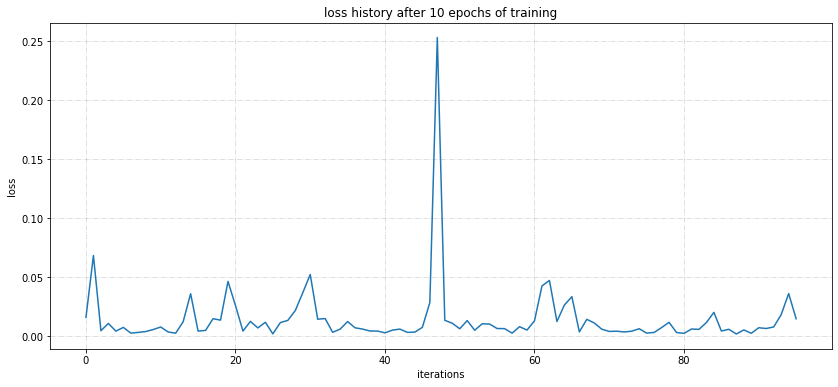

In [0]:
fig, ax1 = plt.subplots(1, 1, figsize=(14,6))

plt.title(f'loss history after 10 epochs of training')
ax1.plot(loss_history)
ax1.grid(alpha=.5, linestyle='-.')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.savefig(f'/content/drive/My Drive/Deep Learning Final Project/2-layer-lstm-loss-10-epochs.jpg')

In [0]:
real_labels = []
predicted_labels = []

with torch.no_grad():
    for i, (seq, label) in enumerate(test_seq):
        seq = seq.to(device)
        label = label.to(device)
        
        model.h0 = torch.zeros(model.num_layers, 1, model.hidden_size, device=device) 
        model.c0 = torch.zeros(model.num_layers, 1, model.hidden_size, device=device)

        real_labels.append(label)
        predicted_labels.append(model(seq))
    

In [0]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(real_labels, predicted_labels)

0.63717777

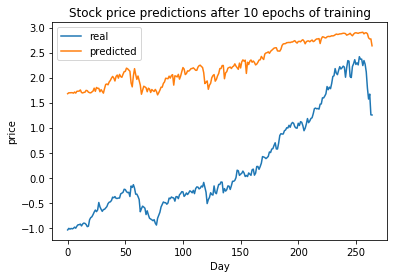

In [0]:

plt.title(f'Stock price predictions after 10 epochs of training')
plt.xlabel('Day')
plt.ylabel('price')
plt.plot(real_labels, label='real')
plt.plot(predicted_labels, label='predicted')
plt.legend();

# plt.savefig(f'/content/drive/My Drive/Deep Learning Final Project/2-layer-lstm-preds-10-epoch.jpg')